## Imports

In [1]:
import pandas as pd  # Manipulação dos dados
import seaborn as sns  # Criação de gráficos estatísticos
import matplotlib.pyplot as plt  # Criação de gráficos
import numpy as np  # Manipulação de valores numéricos

from sklearn.cluster import KMeans  # Algoritmo de clusterização K-Means
from sklearn.preprocessing import StandardScaler  # Pré-processamento de dados: Padronização
from sklearn.decomposition import PCA  # Análise de Componentes Principais
from sklearn.metrics import silhouette_score  # Métrica para avaliação de clusterização

from sklearn.model_selection import train_test_split, GridSearchCV  # Divisão de dados e Busca em Grid
from sklearn.ensemble import RandomForestClassifier  # Classificador Random Forest
from sklearn.metrics import accuracy_score  # Métrica de acurácia

import warnings # Ignorar avisos
warnings.filterwarnings("ignore")


## Dados

In [2]:
# Importando os dados
df = pd.read_csv('data/winequality-red.csv')

In [3]:
# Exibir 5 linhas dos dados
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Algumas informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Análise descritiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Verificação de outliers

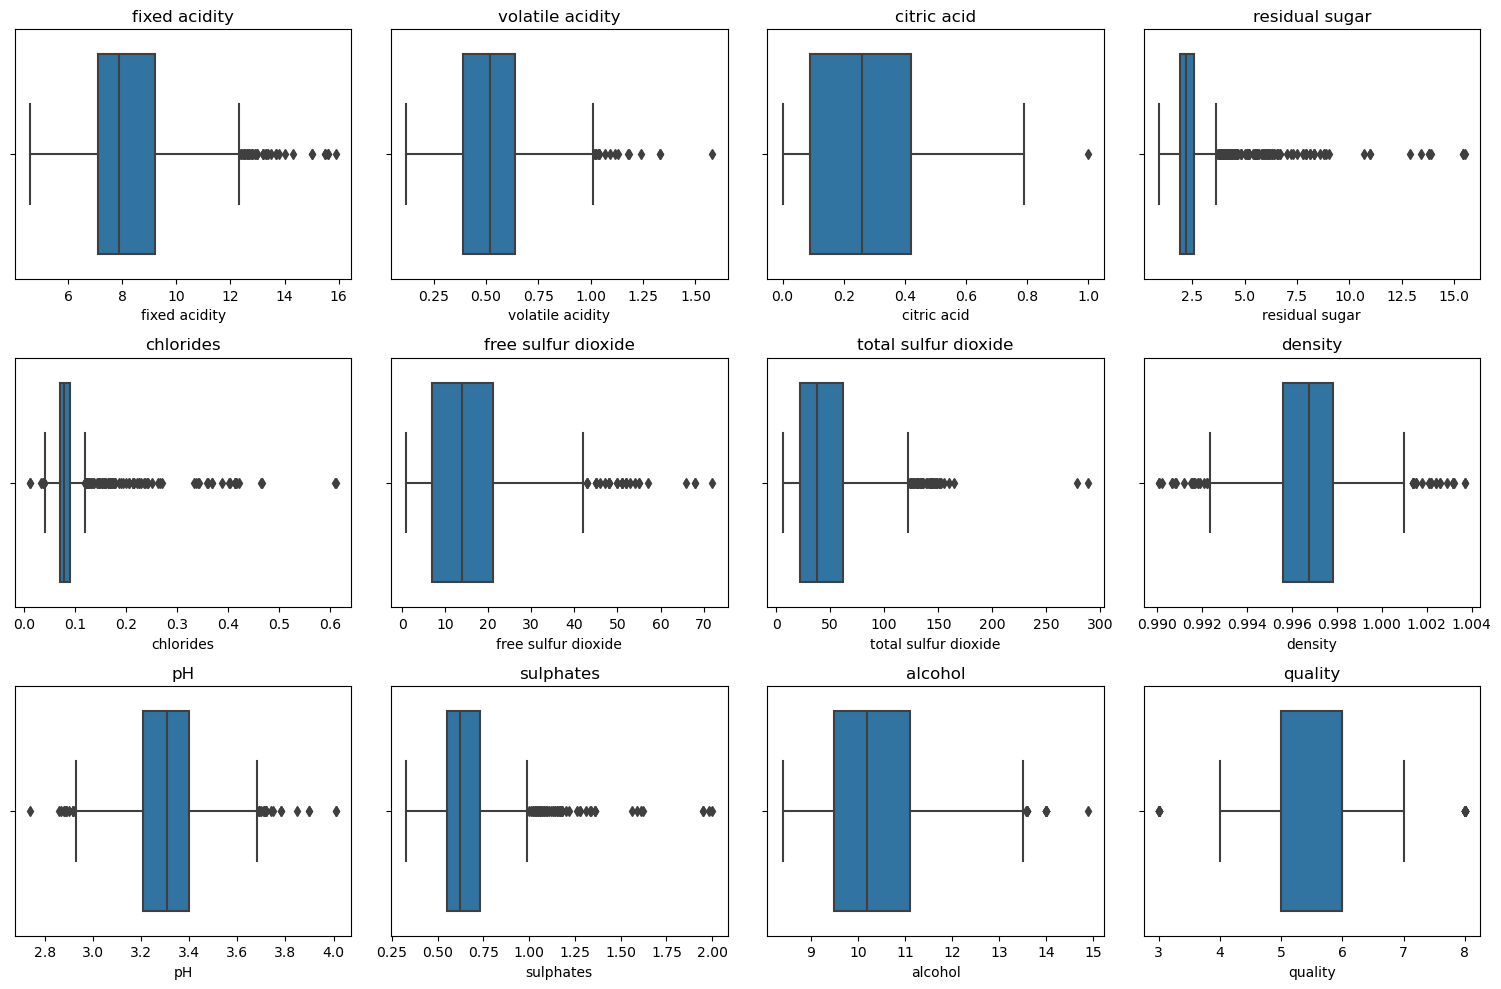

In [6]:
# Subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, coluna in enumerate(df.columns):
    # Calcule as coordenadas do subplot atual
    linha = i // 4  # linha do subplot
    col = i % 4     # coluna do subplot
    
    # Plote o boxplot na posição atual
    sns.boxplot(x=df[coluna], ax=axs[linha, col])
    axs[linha, col].set_title(coluna)  # Adicione um título à subplot

plt.tight_layout()  # Ajuste o layout para evitar sobreposição
plt.show()


## Remoção dos outliers

In [7]:
# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.15)  # Primeiro quartil
    Q3 = df[column].quantile(0.85)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR  # Limite inferior
    upper_bound = Q3 + 1.5 * IQR  # Limite superior
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Remove os outliers de cada coluna
for coluna in df.columns:
    df = remove_outliers_iqr(df, coluna)


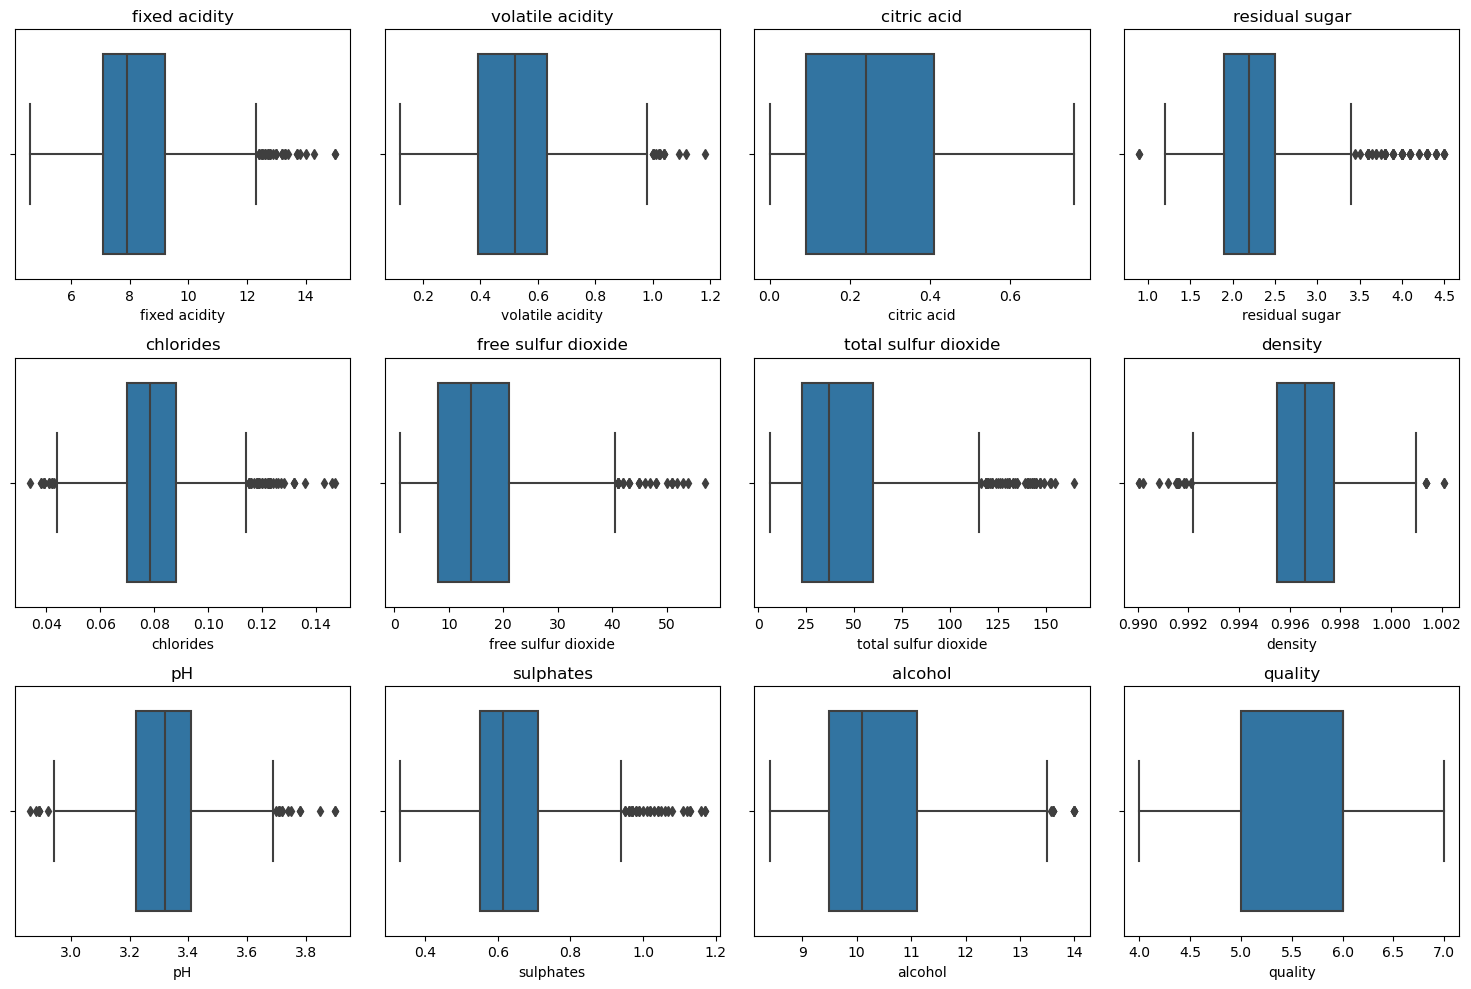

In [8]:
# Boxplots após a remoção de outliers
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))

for i, coluna in enumerate(df.columns):
    # Calcule as coordenadas do subplot atual
    linha = i // 4  # linha do subplot
    col = i % 4     # coluna do subplot
    
    # Plote o boxplot
    sns.boxplot(x = df[coluna], ax = axs[linha, col])
    axs[linha, col].set_title(coluna) 

plt.tight_layout()  # Ajustar o layout
plt.show()


In [9]:
df.shape

(1394, 12)

## Correlação dos dados

<Axes: >

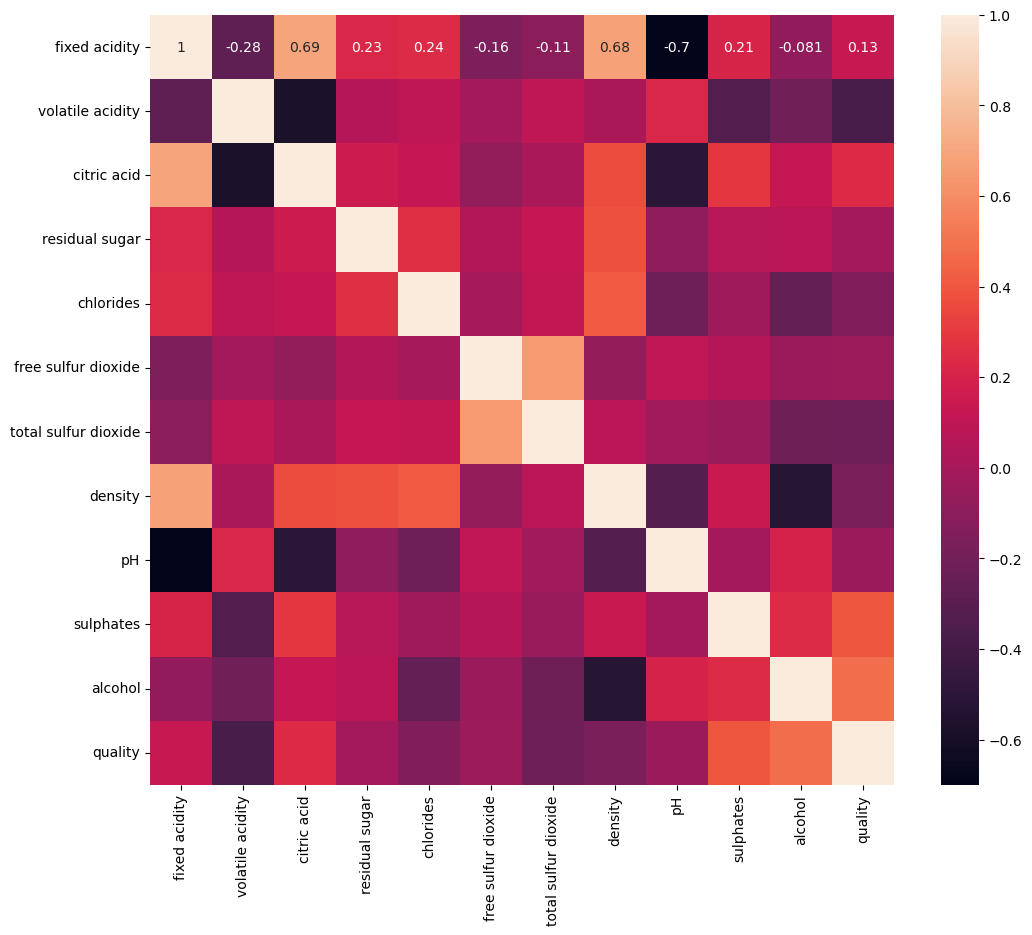

In [10]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True)

## Segmentação de Vinhos

#### Definindo o número de Clusters

In [11]:
# Calcular um limite superior para o número de clusters baseado na raiz quadrada da metade do número de amostras
limit = int((df.shape[0] // 2) ** 0.5)


for k in range(2, limit + 1):           # Iterar sobre diferentes números de clusters
    model = KMeans(n_clusters = k)      # Instanciiar o kMeans
    model.fit(df)                       # Treinar
    pred = model.predict(df)            # Prever
    score = silhouette_score(df, pred)  # Avaliar
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 2: 0.594
Silhouette Score for k = 3: 0.524
Silhouette Score for k = 4: 0.470
Silhouette Score for k = 5: 0.442
Silhouette Score for k = 6: 0.393
Silhouette Score for k = 7: 0.385
Silhouette Score for k = 8: 0.382
Silhouette Score for k = 9: 0.383
Silhouette Score for k = 10: 0.356
Silhouette Score for k = 11: 0.346
Silhouette Score for k = 12: 0.328
Silhouette Score for k = 13: 0.324
Silhouette Score for k = 14: 0.335
Silhouette Score for k = 15: 0.335
Silhouette Score for k = 16: 0.331
Silhouette Score for k = 17: 0.335
Silhouette Score for k = 18: 0.339
Silhouette Score for k = 19: 0.314
Silhouette Score for k = 20: 0.303
Silhouette Score for k = 21: 0.327
Silhouette Score for k = 22: 0.314
Silhouette Score for k = 23: 0.298
Silhouette Score for k = 24: 0.296
Silhouette Score for k = 25: 0.295
Silhouette Score for k = 26: 0.295


### Agora com o N Cluster definido, irei padronizar e diminuir a dimensionalidade

- Padronizar : Garante que todas as variáveis tenham a mesma escala, sendo crucial para algoritmos sensíveis à escala.

- Redução de Dimensionalidade (PCA): Permite representar os dados de forma mais compacta e compreensível, 
facilitando a visualização e interpretação, mantendo a maior parte da informação original.

In [12]:
# Padronizar
ss = StandardScaler()  # StandardScaler para padronizar os dados
X = ss.fit_transform(df)  # Padronizar os dados

# Reduzir as dimensões
pca = PCA(n_components = 2)  # PCA para redução de dimensionalidade
Xpca = pca.fit_transform(X)  # Reduzir

### Aplicação do KMeans para Agrupamento

In [13]:
# Fit KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)  # KMeans com 2 clusters
kmeans.fit(Xpca)  # Treina o modelo KMeans nos dados reduzidos
pred = kmeans.predict(Xpca)  # Faz previsões de cluster nos dados reduzidos

### Plotando o Agrupamento

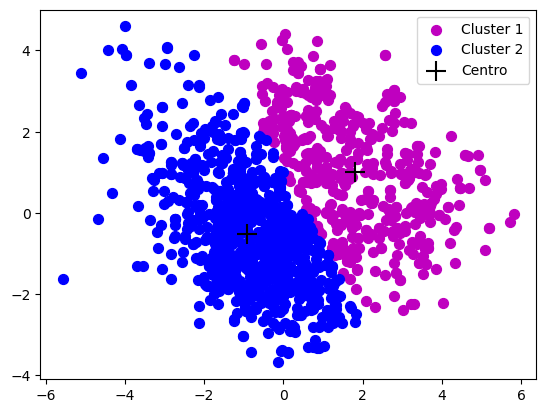

In [14]:
cores = ['m', 'b'] # Cores
for i in range(len(cores)):
    # Plotando os pontos de dados para cada cluster
    plt.scatter(Xpca[pred == i, 0], Xpca[pred == i, 1], 
                s = 50, c = cores[i], label = 'Cluster ' + str(i+1))
    
# Plotando os centróides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 200, marker = '+', c = 'black', label = 'Centro')

plt.legend()
plt.show()


### Adicionando o agrupamento no df

In [15]:
df['cluster'] = pred
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Treinando e Prevendo Clusters

### Separando os dados em treino e teste

In [16]:
X = df.drop('cluster', axis=1)
y = df['cluster']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Usando GridSearchCV para encontrar os melhores parâmetros

In [18]:
rf = RandomForestClassifier() # Intanciar o RandomForest

# Definir alguns valores do grid para os parâmetros
grid_values = {'max_depth': [None, 10, 5, 3, 1],
               'min_samples_leaf': [1, 5, 10, 20]}

grid_rf = GridSearchCV(rf, param_grid = grid_values, cv = 10, scoring = 'accuracy') # Instanciar o GridSearchCV
grid_rf.fit(xtrain, ytrain) # Executa a busca dos melhores parâmetros
grid_rf.best_params_ # Retorna os melhores parâmetros

{'max_depth': 10, 'min_samples_leaf': 1}

### Treinando e prevendo os dados

In [19]:

# Intanciar o RandomForest com os melhores parâmetros
rf = RandomForestClassifier(max_features = 'sqrt', 
                            max_depth = None,
                            min_samples_leaf = 1,
                            random_state = 0)

rf.fit(xtrain, ytrain) # Treinando o modelo
ypred = rf.predict(xtest) # Prevendo
accuracy = accuracy_score(ytest, ypred) # Calcula a acurácia da predição

### Resultados

In [20]:
print('Acurácia de Treino : ', accuracy_score(ytrain, rf.predict(xtrain)))
print('Acurácia de Teste : ', accuracy_score(ytest, ypred))

Acurácia de Treino :  1.0
Acurácia de Teste :  0.992831541218638
